In [5]:
import math
import copy
import numpy as np
import pandas as pd
from operator import itemgetter
from scipy import optimize
from importlib import reload

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import LogNorm
from matplotlib import cm

from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import seaborn

import Nelder_Mead as NM
reload(NM)

%matplotlib inline

In [6]:
def func(x):
    return math.sin(x[0]) * math.cos(x[1]) * (1. / (abs(x[2]) + 1))

# The Rosenbrock function
def Rosen(x):
    x = np.asarray(x)
    r = np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0,
                  axis=0)
    return r

In [8]:
x0 = [-1.2,2.0,3.0]
results = NM.Nelder_Mead(x0,Rosen)
results

Converged


array([  1.00001928e+00,   1.00003267e+00,   1.00005760e+00,
         1.08914779e-08])

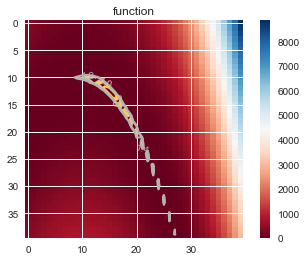

In [9]:
# the function that I'm going to plot
def z_func(x,y):
    return (1-(x**2+y**3))*np.exp(-(x**2+y**2)/2)
def func2d(x,y):
    return math.sin(x) * math.cos(y) * (1. / (abs(x*y) + 1))

# The Rosenbrock function
def Rosen2d(x,y):
    r = 100.0 * (y - x**2.0)**2.0 + (1 - x)**2.0
    return r
 
func_to_use = Rosen2d

x = np.arange(-1.0,3.0,0.1)
y = np.arange(-1.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = func_to_use(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,np.arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('function')
show()

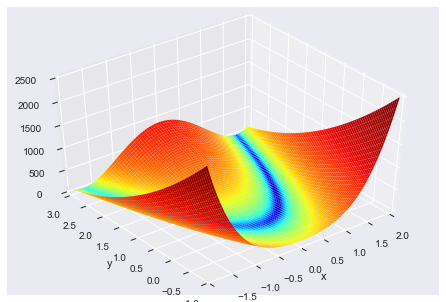

In [10]:
fig = plt.figure()
ax = Axes3D(fig, azim = -128, elev = 43)
s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)
Z = func_to_use(X,Y)
# ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
# Without using `` linewidth=0, edgecolor='none' '', the code may produce a graph with wide black edges, which 
# will make the surface look much darker than the one illustrated in the figure above.
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet, linewidth=0, edgecolor='none')

# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       
ax.set_zlim([0, 2500]) 

plt.xlabel("x")
plt.ylabel("y")

plt.savefig("Rosenbrock function.svg")

plt.show()